In [26]:
import numpy as np
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from PIL import Image
import os

# stałe
number_of_classes = 10
image_size = (250, 250)
batch_size = 32
root_folder = "..\\F1 teams"

# utworzenie zmiennej zawierającej nazwy zespołów 
list_of_teams = os.listdir(root_folder)
class_to_name = {}
for i, team in enumerate(list_of_teams):
    class_to_name[i] = team

images=[]
labels=[]

# załadowanie utworzonych danych
for team in os.listdir(root_folder):
    team_path = os.path.join(root_folder, team)

    if os.path.isdir(team_path):
        for img_file in os.listdir(team_path):
            if img_file == "logo.jpg":
                continue
            img_path = os.path.join(team_path, img_file)
            try:
                img = Image.open(img_path)
                img_array = np.array(img)
                images.append(img_array)
                labels.append(team)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

images = np.array(images)
labels = np.array(labels)

print(f"Loaded {len(images)} images with corresponding labels.")


Loaded 2500 images with corresponding labels.


In [27]:
# przygotowanie danych
X = images / 255.0
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(labels))

# podział danych na zbiory uczące, testowe i walidacyjne
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [28]:
# wprowadzenie dodatkowej losowości w zbiorach uczących
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

models = []

In [29]:
# definicja modelu z funkcją aktywacji ReLU
model_relu = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(number_of_classes, activation='softmax')  # Output layer
])

model_relu.compile(loss=keras.losses.CategoricalCrossentropy, optimizer="adam", metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
model_relu.summary()

C:\Users\Wojtek\PycharmProjects\uczenieMaszynowe\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │    27,558,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,653,962 (105.49 MB)

 Trainable params: 27,653,962 (105.49 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model_leaky_relu = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='leaky_relu', input_shape=(250, 250, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='leaky_relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='leaky_relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(number_of_classes, activation='softmax')
])

model_leaky_relu.compile(loss=keras.losses.CategoricalCrossentropy, optimizer="adam", metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
model_leaky_relu.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │    27,558,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,653,962 (105.49 MB)

 Trainable params: 27,653,962 (105.49 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# uczenie modelu z funkcją aktywacji ReLU
model_relu.fit(val_generator, batch_size=32, epochs=15)
models.append(model_relu)

C:\Users\Wojtek\PycharmProjects\uczenieMaszynowe\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 867ms/step - accuracy: 0.1441 - loss: 4.4957 - precision_1: 0.1594 - recall_1: 0.0647
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 759ms/step - accuracy: 0.4654 - loss: 1.5057 - precision_1: 0.8343 - recall_1: 0.2127
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 772ms/step - accuracy: 0.6711 - loss: 0.8194 - precision_1: 0.8096 - recall_1: 0.5455
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 797ms/step - accuracy: 0.7650 - loss: 0.6053 - precision_1: 0.8350 - recall_1: 0.6786
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 755ms/step - accuracy: 0.8541 - loss: 0.4024 - precision_1: 0.8815 - recall_1: 0.8116
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 750ms/step - accuracy: 0.8887 - loss: 0.3395 - precision_1: 0.8950 - recall_1: 0.8776
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 794ms/step - accuracy: 0.9340 - loss: 0.2080 - precision_1: 0.9364 - recall_1: 0.9263
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 747ms/step - accuracy: 0.9536 - loss: 0.1049 - precision_1: 0.9535 

In [43]:
# uczenie modelu z funkcją aktywacji softmax
model_leaky_relu.fit(val_generator, batch_size=32, epochs=15)
models.append(model_leaky_relu)

Epoch 1/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 816ms/step - accuracy: 0.2437 - loss: 5.4940 - precision_5: 0.2490 - recall_5: 0.1202
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 801ms/step - accuracy: 0.7525 - loss: 0.8128 - precision_5: 0.8616 - recall_5: 0.4841
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 787ms/step - accuracy: 0.8497 - loss: 0.4020 - precision_5: 0.8815 - recall_5: 0.8142
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 798ms/step - accuracy: 0.9229 - loss: 0.2139 - precision_5: 0.9206 - recall_5: 0.8925
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 795ms/step - accuracy: 0.9869 - loss: 0.0473 - precision_5: 0.9869 - recall_5: 0.9869
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 813ms/step - accuracy: 0.9657 - loss: 0.1026 - precision_5: 0.9657 - recall_5: 0.9657
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 789ms/step - accuracy: 0.9915 - loss: 0.0427 - precision_5: 0.9915 - recall_5: 0.9915
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 803ms/step - accuracy: 0.9959 - loss: 0.0164 - precision_5: 0.9

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models = []
models.append(model_relu)
models.append(model_leaky_relu)
# ewaluacja modelu
for model in models:
    loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
    print(f"Validation loss: {loss},\nvalidation Accuracy: {accuracy},\nvalidation precision: {precision},\nvalidation recall: {recall}")

# ręczne sprawdzenie modelu na danych spoza zbioru
# łatwy przykład - obraz wyglądający jak dane uczące
image_path = "..\\F1 teams\\test.jpg" # oczekiwana klasa: Ferrari

# przekształcenie obrazka do postaci przyjmowanej przez model
img = load_img(image_path, target_size=(250, 250))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction_relu = model_relu.predict(img_array)
prediction_softmax = model_leaky_relu.predict(img_array)
# Convert true labels (y_test) from one-hot encoding to class indices
y_test_labels = np.argmax(y_test, axis=1)

predicted_class_relu = np.argmax(prediction_relu, axis=-1)[0]
predicted_class_softmax = np.argmax(prediction_softmax, axis=-1)[0]
print(f"Expected class: Ferrari")
print(f"Predicted class (ReLU): {class_to_name[predicted_class_relu]}")
print(f"Predicted class (softmax): {class_to_name[predicted_class_softmax]}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.9910 - loss: 0.0292 - precision_1: 0.9910 - recall_1: 0.9910
Validation loss: 0.03134557232260704,
validation Accuracy: 0.9893333315849304,
validation precision: 0.9893333315849304,
validation recall: 0.9893333315849304
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.9948 - loss: 0.0277 - precision_5: 0.9948 - recall_5: 0.9948
Validation loss: 0.026990588754415512,
validation Accuracy: 0.9946666955947876,
validation precision: 0.9946666955947876,
validation recall: 0.9946666955947876
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Expected class: Ferrari
Predicted class (ReLU): Ferrari
Predicted class (softmax): Ferrari


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step


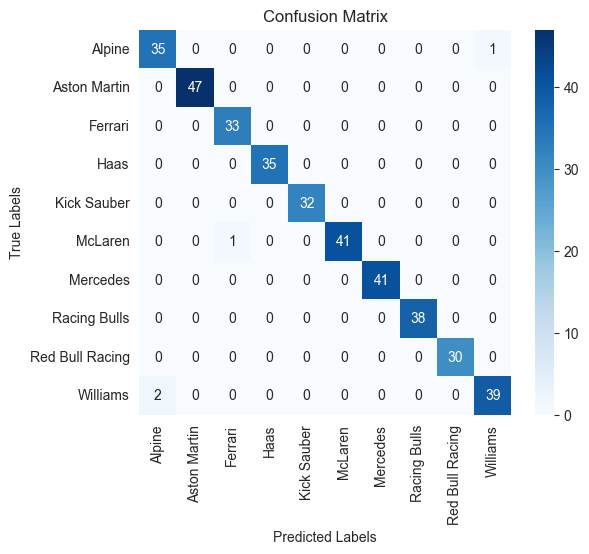

                 precision    recall  f1-score   support

         Alpine       0.95      0.97      0.96        36
   Aston Martin       1.00      1.00      1.00        47
        Ferrari       0.97      1.00      0.99        33
           Haas       1.00      1.00      1.00        35
    Kick Sauber       1.00      1.00      1.00        32
        McLaren       1.00      0.98      0.99        42
       Mercedes       1.00      1.00      1.00        41
   Racing Bulls       1.00      1.00      1.00        38
Red Bull Racing       1.00      1.00      1.00        30
       Williams       0.97      0.95      0.96        41

       accuracy                           0.99       375
      macro avg       0.99      0.99      0.99       375
   weighted avg       0.99      0.99      0.99       375



In [45]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# wyświetlenie "confusion matrix"
y_pred = model_relu.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Williams oraz Alpine jako jedyne są regularnie mylone, ze względu na zastosowanie podobnego koloru w logo oraz ostre krawędzie

print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))